In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
## loading data
nestdf = pd.read_csv('Nest.csv')
partavgdf = pd.read_csv('Part_Avg.csv')

In [3]:
joined_nest_partsavg_df = pd.merge(nestdf, partavgdf, on='ixJobSummary', how='inner')
joined_nest_partsavg_df #avg num of parts and nest data in one df

,ixJobSummary,fStrategies,dLengthUsed_Avg,dWidthUsed_Avg,dPartArea_Job,dTrueAreaRectified_Job,dLength_Avg,dWidth_Avg,dArea_Avg,cNested_Avg,fExtShape_Avg,dExtArea_Avg,dExtBoundaryDist_Avg,dExtContainedDist_Avg,dLgIntArea_Avg,dLgIntBoundaryDist_Avg,dLgIntContainedDist_Avg,dLgExtConArea_Avg,dLgExtConBoundaryDist,dLgExtConContainedDist
0,130032,0,240.000000,95.990000,519.0404,23037.600000,11.214286,7.588371,58.148629,1,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,145075,8,108.453240,39.263200,18389.9746,21573.573062,38.347309,12.843400,475.076800,4,5,496.283591,6.026536,39.581636,14.593373,0.535145,2.846391,12.247745,0.341673,0.728891
2,233110,8,38.709400,35.736100,879.9165,1383.322989,37.702200,20.209600,439.958200,2,0,439.958200,9.161500,36.520700,0.000000,0.000000,0.000000,60.162600,2.761000,12.675600
3,286531,8,69.701700,60.558550,5992.2342,9448.707993,17.103650,18.125000,191.540050,12,0,193.776600,6.589750,20.581050,0.279550,0.000000,0.125000,35.632250,2.375000,4.500000
4,504531,0,6.807000,38.006900,198.8594,258.712968,37.000000,5.800000,198.859400,1,0,198.859400,2.644400,37.148100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790931,2583832,0,143.770400,94.319500,3562.2303,13560.352243,52.203125,32.046875,815.453875,1,2,1175.660175,15.350675,52.728425,355.015300,7.125000,15.062500,0.000000,0.000000,0.000000
1790932,548877,4,34.513950,55.300350,2898.6813,4526.656120,23.053571,13.199986,273.049857,4,3,296.410943,6.052186,25.126200,3.782143,0.233057,1.326471,0.000000,0.000000,0.000000
1790933,2420784,8,83.969400,33.398500,1732.8873,2804.452006,83.057750,4.540683,288.814567,1,16,331.347183,2.041967,83.173917,10.515283,0.609483,2.738883,0.000000,0.000000,0.000000
1790934,2302130,8,80.844067,54.065133,7208.6328,14136.765442,43.584450,40.175350,693.526650,5,0,1308.887900,15.457300,51.257850,504.934150,7.507200,22.396550,61.498750,1.939500,9.697650


In [4]:
joined_nest_partsavg_df['CropUtil'] = joined_nest_partsavg_df['dPartArea_Job'] / joined_nest_partsavg_df['dTrueAreaRectified_Job']

joined_nest_partsavg_df.drop('dLengthUsed_Avg', axis=1, inplace=True)
joined_nest_partsavg_df.drop('dWidthUsed_Avg', axis=1, inplace=True)
joined_nest_partsavg_df.drop('dTrueAreaRectified_Job', axis=1, inplace=True)


joined_nest_partsavg_df.drop('ixJobSummary', axis=1, inplace=True)

joined_nest_partsavg_df

,fStrategies,dPartArea_Job,dLength_Avg,dWidth_Avg,dArea_Avg,cNested_Avg,fExtShape_Avg,dExtArea_Avg,dExtBoundaryDist_Avg,dExtContainedDist_Avg,dLgIntArea_Avg,dLgIntBoundaryDist_Avg,dLgIntContainedDist_Avg,dLgExtConArea_Avg,dLgExtConBoundaryDist,dLgExtConContainedDist,CropUtil
0,0,519.0404,11.214286,7.588371,58.148629,1,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022530
1,8,18389.9746,38.347309,12.843400,475.076800,4,5,496.283591,6.026536,39.581636,14.593373,0.535145,2.846391,12.247745,0.341673,0.728891,0.852431
2,8,879.9165,37.702200,20.209600,439.958200,2,0,439.958200,9.161500,36.520700,0.000000,0.000000,0.000000,60.162600,2.761000,12.675600,0.636089
3,8,5992.2342,17.103650,18.125000,191.540050,12,0,193.776600,6.589750,20.581050,0.279550,0.000000,0.125000,35.632250,2.375000,4.500000,0.634186
4,0,198.8594,37.000000,5.800000,198.859400,1,0,198.859400,2.644400,37.148100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.768649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790931,0,3562.2303,52.203125,32.046875,815.453875,1,2,1175.660175,15.350675,52.728425,355.015300,7.125000,15.062500,0.000000,0.000000,0.000000,0.262695
1790932,4,2898.6813,23.053571,13.199986,273.049857,4,3,296.410943,6.052186,25.126200,3.782143,0.233057,1.326471,0.000000,0.000000,0.000000,0.640358
1790933,8,1732.8873,83.057750,4.540683,288.814567,1,16,331.347183,2.041967,83.173917,10.515283,0.609483,2.738883,0.000000,0.000000,0.000000,0.617906
1790934,8,7208.6328,43.584450,40.175350,693.526650,5,0,1308.887900,15.457300,51.257850,504.934150,7.507200,22.396550,61.498750,1.939500,9.697650,0.509921


In [5]:
# Separate data by strategy
strategy_groups = joined_nest_partsavg_df.groupby('fStrategies')

In [6]:
for strategy, group in strategy_groups:
    print(str(strategy)+" "+str(group.shape))

-2147483648 (520786, 17)
0 (692368, 17)
1 (48044, 17)
2 (10651, 17)
4 (14756, 17)
8 (218856, 17)
16 (20268, 17)
32 (5968, 17)
64 (4433, 17)
128 (16858, 17)
256 (2465, 17)
512 (26634, 17)
1024 (12292, 17)
2048 (6585, 17)
4096 (13020, 17)
8192 (83085, 17)
16384 (93867, 17)


In [7]:
# Placeholder for models and scalers
models = {}
scalers = {}

In [8]:
for strategy, group in strategy_groups:
    X = group.drop(columns=['CropUtil', 'fStrategies'])
    y = group['CropUtil']

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the modified data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize and train the linear regression model
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = linear_regression_model.predict(X_test)

    # Calculate and print the Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error for strategy {strategy}: {mae}")

    # Store the models and scalers
    models[strategy] = linear_regression_model
    scalers[strategy] = scaler



Mean Absolute Error for strategy -2147483648: 0.17243847310179375
Mean Absolute Error for strategy 0: 0.17007085061048358
Mean Absolute Error for strategy 1: 0.12087709037506864
Mean Absolute Error for strategy 2: 0.07587781897573186
Mean Absolute Error for strategy 4: 0.10831671082297177
Mean Absolute Error for strategy 8: 0.11130536659789601
Mean Absolute Error for strategy 16: 0.1008931848941399
Mean Absolute Error for strategy 32: 0.11463965895750546
Mean Absolute Error for strategy 64: 0.10674503232528745
Mean Absolute Error for strategy 128: 0.11334468477553149
Mean Absolute Error for strategy 256: 0.09056337047297233
Mean Absolute Error for strategy 512: 0.11708796531329731
Mean Absolute Error for strategy 1024: 0.12435057973973145
Mean Absolute Error for strategy 2048: 0.12670126339086432
Mean Absolute Error for strategy 4096: 0.12620449579268003
Mean Absolute Error for strategy 8192: 0.1336700162174164
Mean Absolute Error for strategy 16384: 0.1184001536864067


In [9]:
import os
import joblib

# Create directories if they don't exist
os.makedirs('models', exist_ok=True)
os.makedirs('scalers', exist_ok=True)

In [10]:
# Save the models, scalers, and encoders
for strategy, group in strategy_groups:
    # Save the regression model
    model_path = f'models/{strategy}_rf_model.pkl'
    joblib.dump(models[strategy], model_path)
    
    # Save the scaler
    scaler_path = f'scalers/{strategy}_scaler.pkl'
    joblib.dump(scalers[strategy], scaler_path)

**Load the Saved models and Check MAE and MSE for Test Data**

In [11]:
import joblib
from sklearn.metrics import mean_squared_error

In [12]:

for strategy, group in strategy_groups:
    X = group.drop(columns=['CropUtil', 'fStrategies'])
    y = group['CropUtil']

    # Load the scaler
    scaler_path = f'scalers/{strategy}_scaler.pkl'
    scaler = joblib.load(scaler_path)

    model_path = f'models/{strategy}_rf_model.pkl'
    model = joblib.load(model_path)

    ##

    X_scaled = scaler.transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Evaluate the model
    y_pred = model.predict(X_test)
    mae = mean_squared_error(y_test, y_pred)
    print(f'Strategy {strategy} - LR MSE: {mae}')


Strategy -2147483648 - LR MSE: 0.0980084430463011
Strategy 0 - LR MSE: 0.0450198937374987
Strategy 1 - LR MSE: 0.02687933690243882
Strategy 2 - LR MSE: 0.011879141313046505
Strategy 4 - LR MSE: 0.02232421668214775
Strategy 8 - LR MSE: 0.02232806198457021
Strategy 16 - LR MSE: 0.018775997365779083
Strategy 32 - LR MSE: 0.021725520313180292
Strategy 64 - LR MSE: 0.020679917467253818
Strategy 128 - LR MSE: 0.02127611297982527
Strategy 256 - LR MSE: 0.013161282463616423
Strategy 512 - LR MSE: 0.023417447469896414
Strategy 1024 - LR MSE: 0.024992534966316746
Strategy 2048 - LR MSE: 0.02666244532614787
Strategy 4096 - LR MSE: 0.02580255400339677
Strategy 8192 - LR MSE: 0.02814165436948613
Strategy 16384 - LR MSE: 0.022752977038507174


In [14]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 36.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.0/245.0 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 47.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 9.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Strategy -2147483648: 


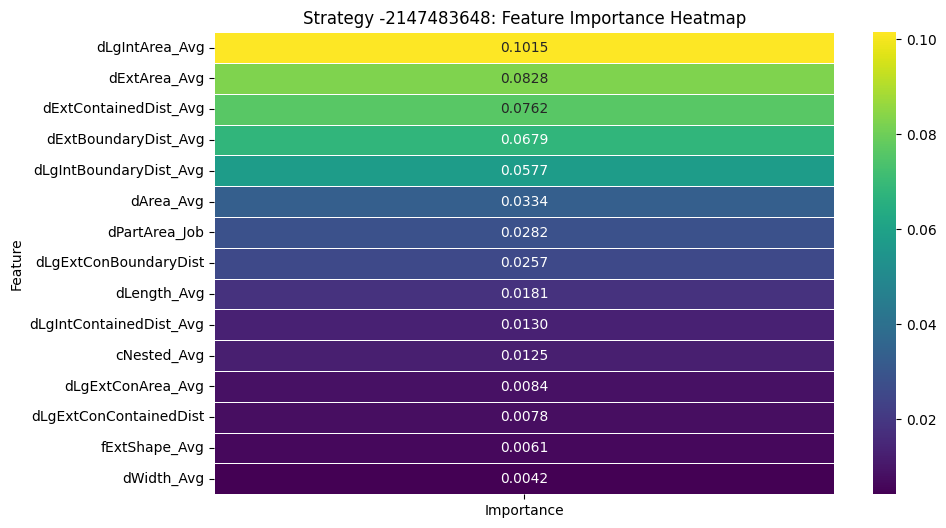

Strategy 0: 


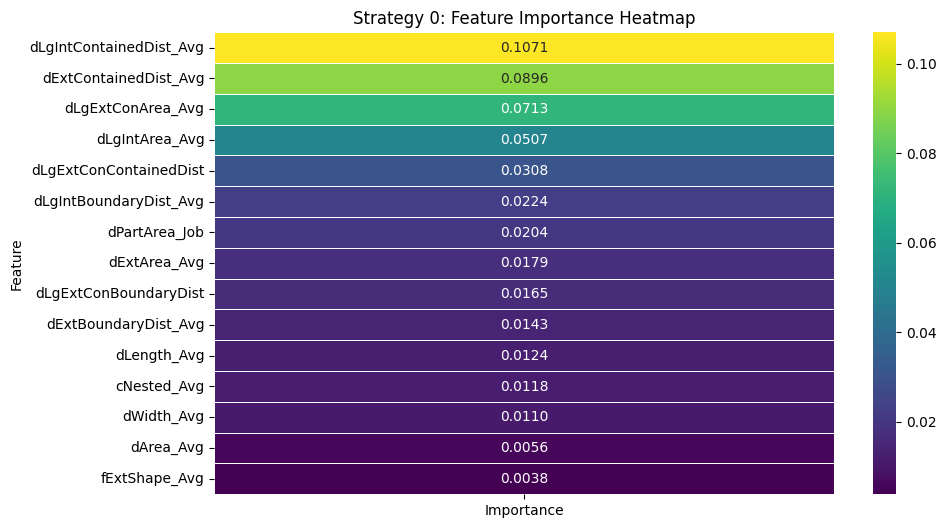

Strategy 1: 


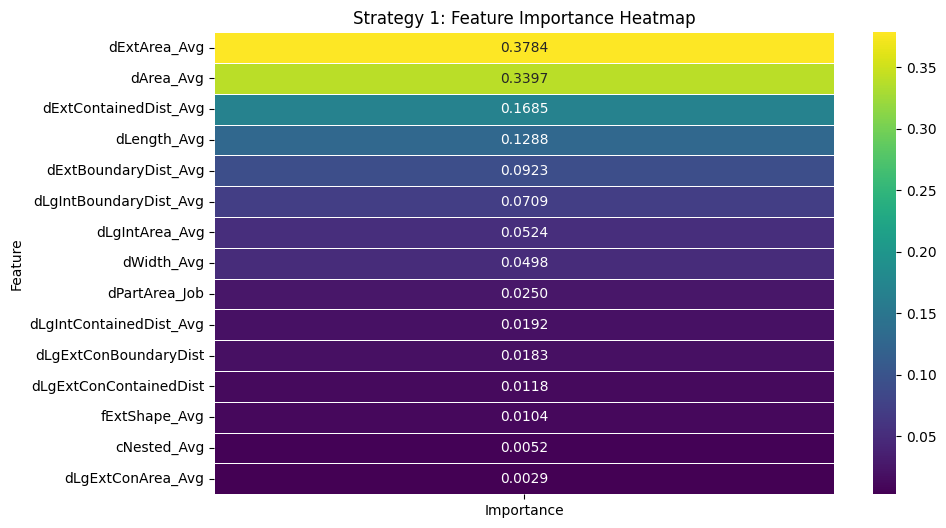

Strategy 2: 


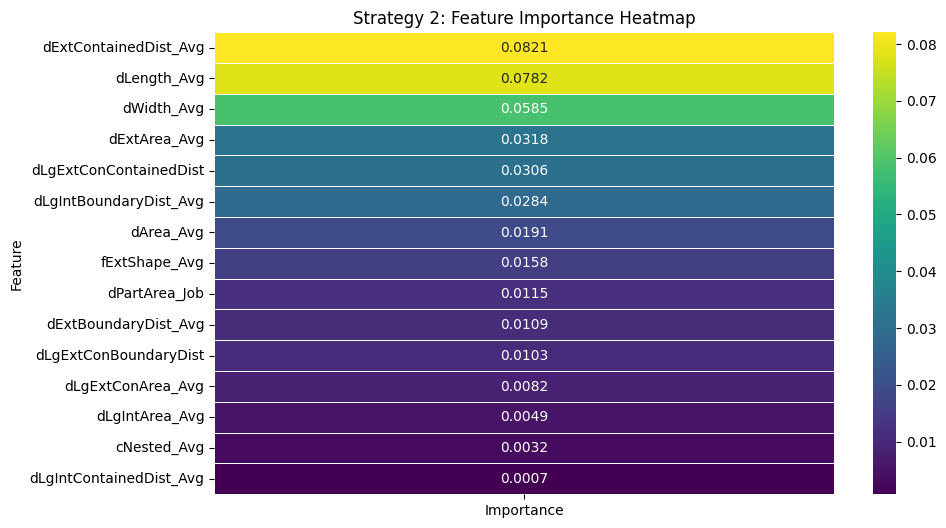

Strategy 4: 


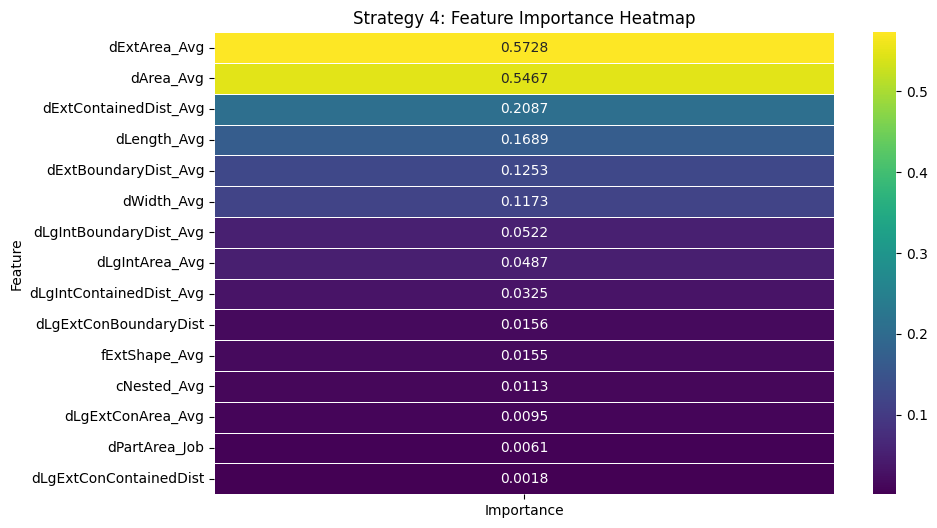

Strategy 8: 


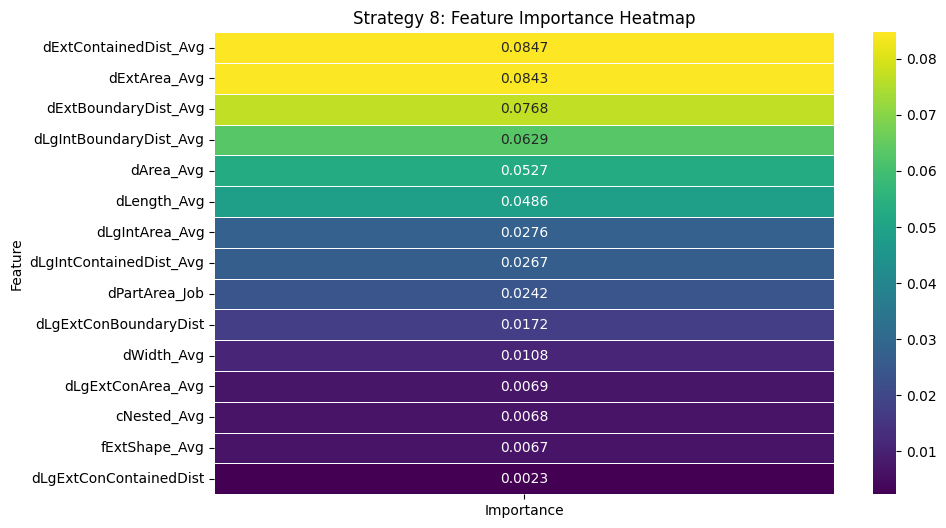

Strategy 16: 


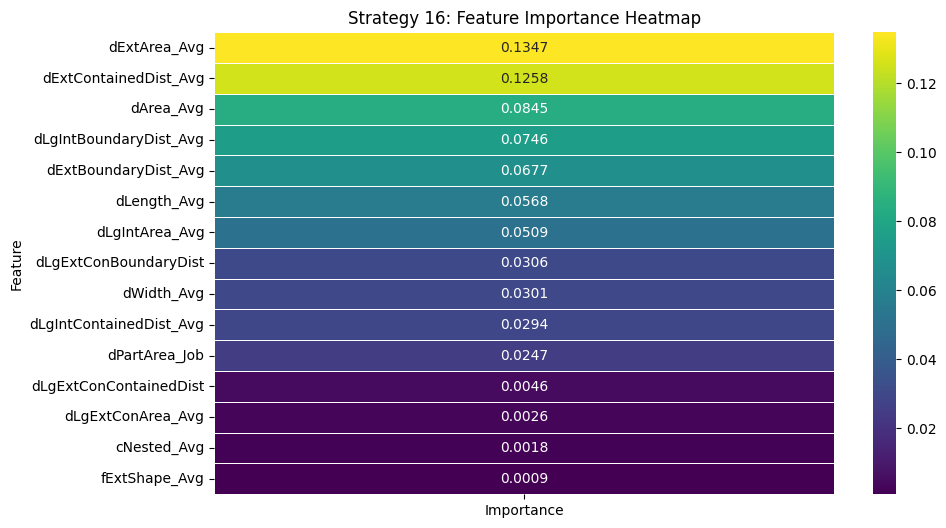

Strategy 32: 


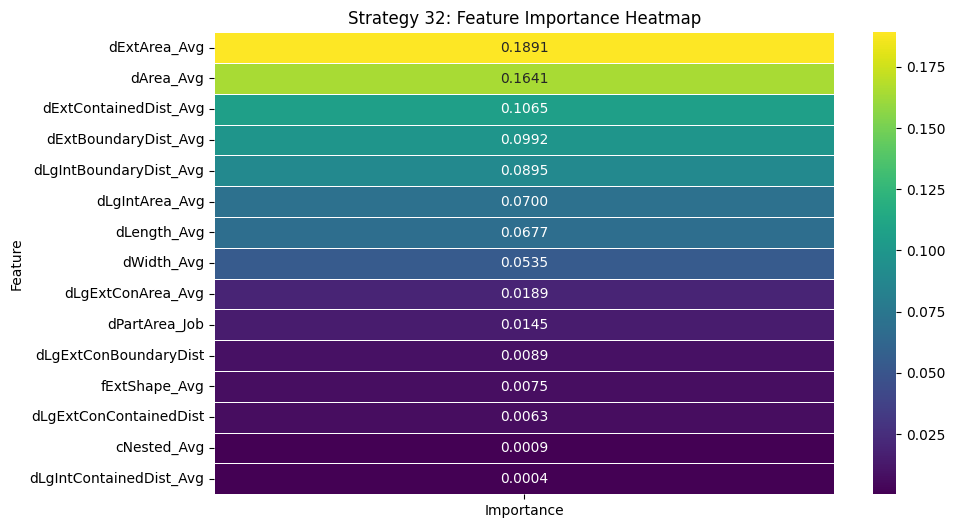

Strategy 64: 


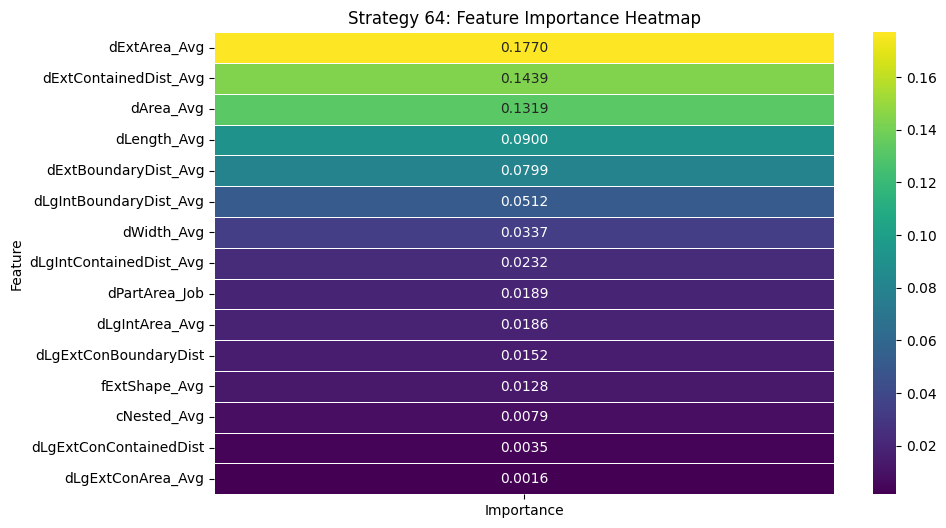

Strategy 128: 


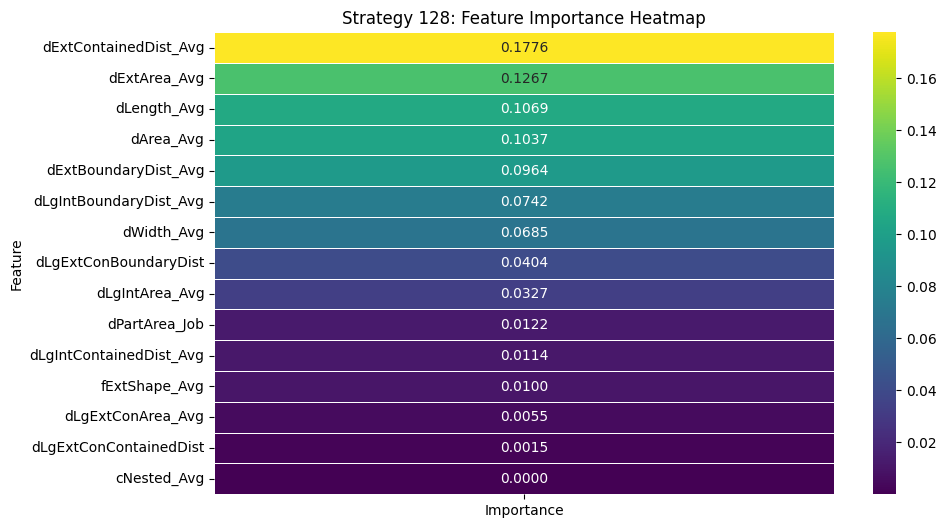

Strategy 256: 


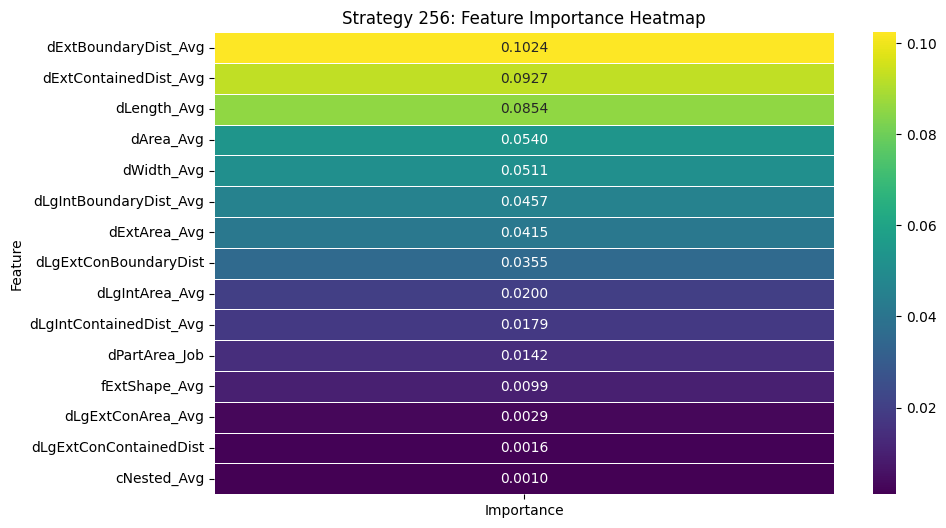

Strategy 512: 


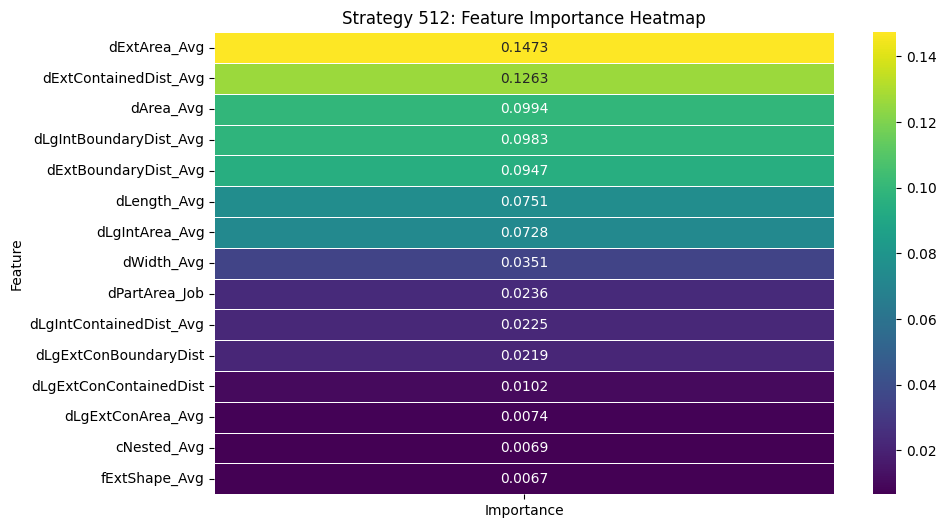

Strategy 1024: 


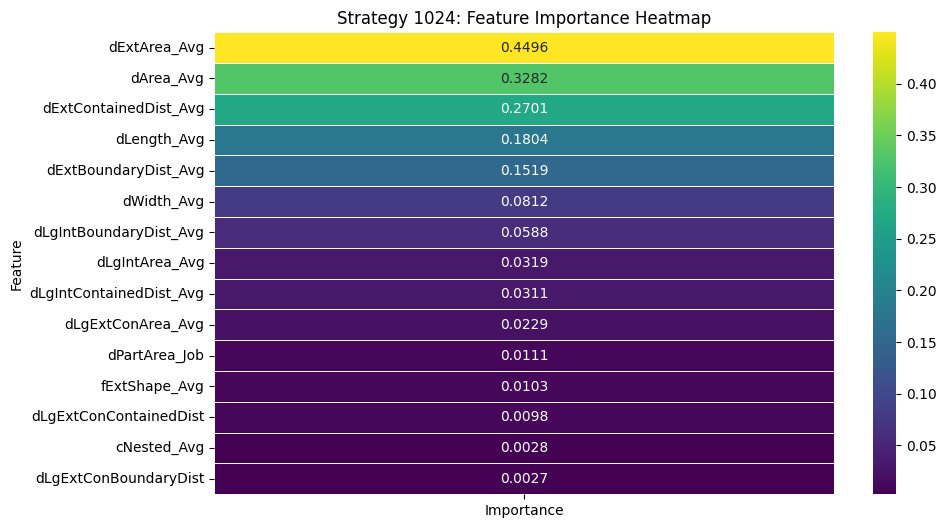

Strategy 2048: 


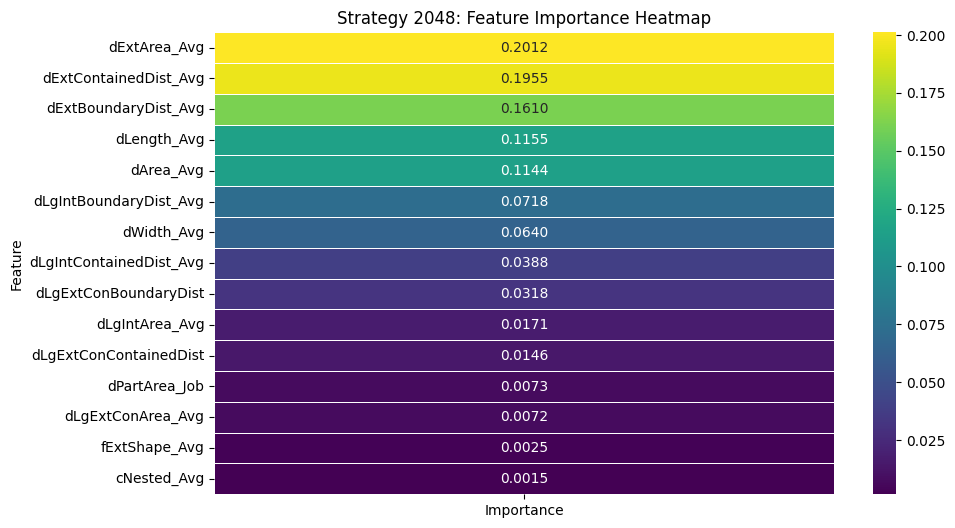

Strategy 4096: 


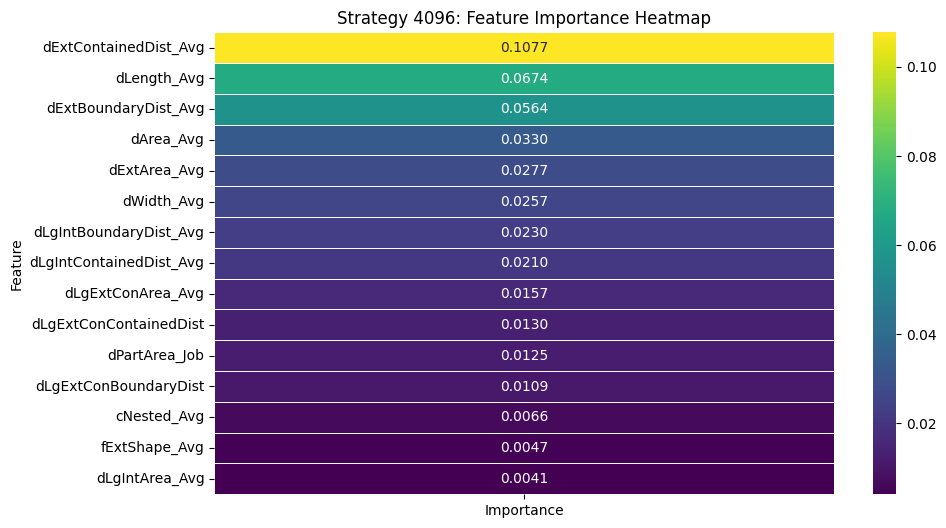

Strategy 8192: 


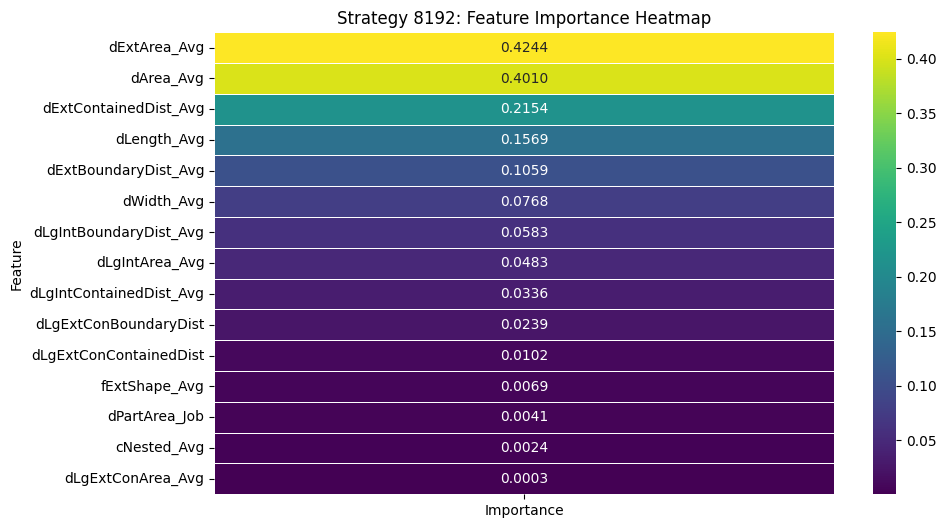

Strategy 16384: 


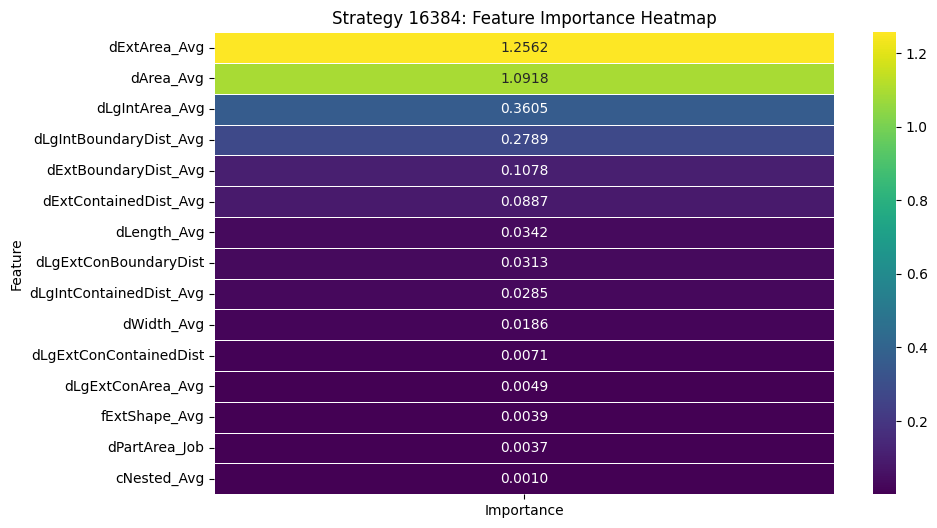

In [18]:
for strategy, group in strategy_groups:
    print("Strategy " + str(strategy)+": ")
    X = group.drop(columns=['CropUtil', 'fStrategies'])
    y = group['CropUtil']
    

    # Load the scaler
    scaler_path = f'scalers/{strategy}_scaler.pkl'
    scaler = joblib.load(scaler_path)

    model_path = f'models/{strategy}_rf_model.pkl'
    model = joblib.load(model_path)
    
    X_scaled = scaler.transform(X)

    # Split the modified data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Get the coefficients from the trained model
    coefficients = model.coef_

    # Get the names of the features
    feature_names = X.columns  # Assuming X_train is a DataFrame

    # Create a dictionary to store feature importance
    feature_importance = {}

    # Pair each feature with its coefficient
    for i in range(len(feature_names)):
        feature_importance[feature_names[i]] = np.abs(coefficients[i])

    # Sort the features based on their absolute coefficients
    sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

    # Convert sorted feature importance into a DataFrame for easier plotting
    sorted_feature_importance_df = pd.DataFrame(sorted_feature_importance, columns=['Feature', 'Importance'])

    # Create a heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(sorted_feature_importance_df.set_index('Feature'), cmap='viridis', annot=True, fmt=".4f", linewidths=0.5)
    plt.title("Strategy " + str(strategy)+": Feature Importance Heatmap")
    plt.ylabel('Feature')
    plt.show()

Mean Absolute Error for strategy -2147483648: 0.17243847310179375


/var/folders/fh/jgqm1yt151v7yq2mx7jg_v_w0000gn/T/ipykernel_17620/639671824.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


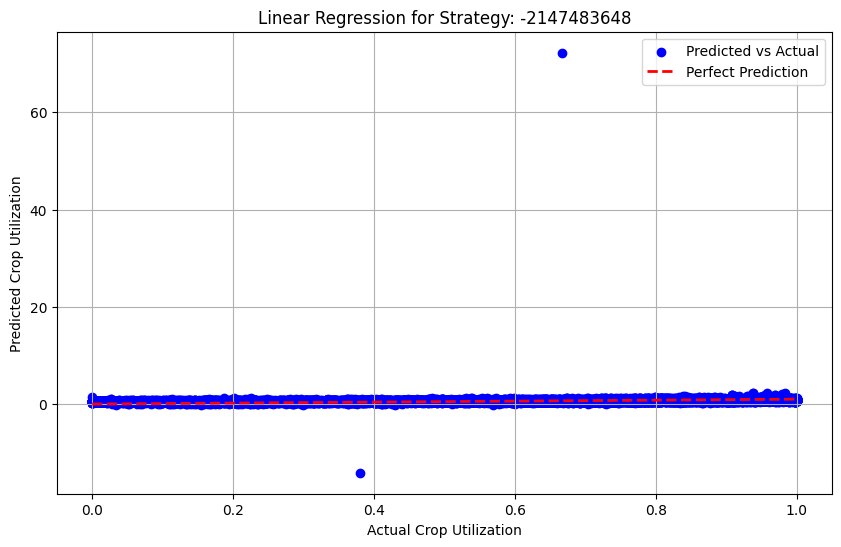

Mean Absolute Error for strategy 0: 0.17007085061048358


/var/folders/fh/jgqm1yt151v7yq2mx7jg_v_w0000gn/T/ipykernel_17620/639671824.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


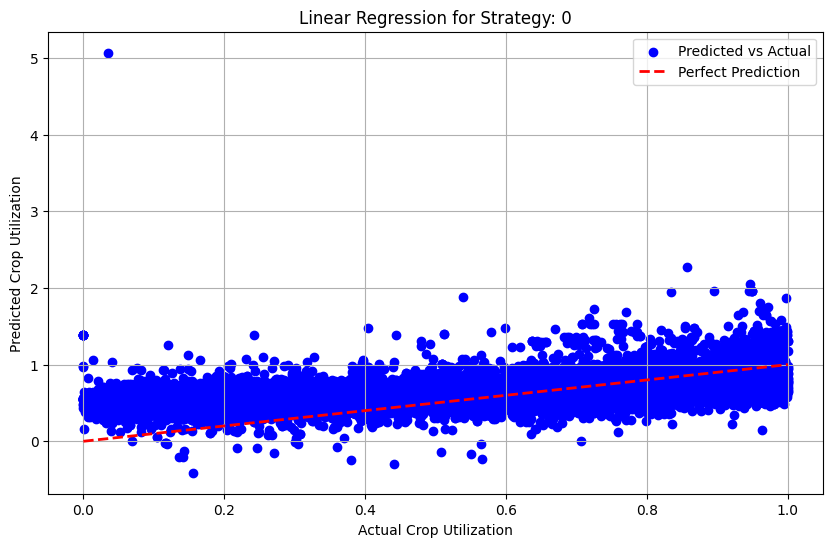

Mean Absolute Error for strategy 1: 0.12087709037506864


/var/folders/fh/jgqm1yt151v7yq2mx7jg_v_w0000gn/T/ipykernel_17620/639671824.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


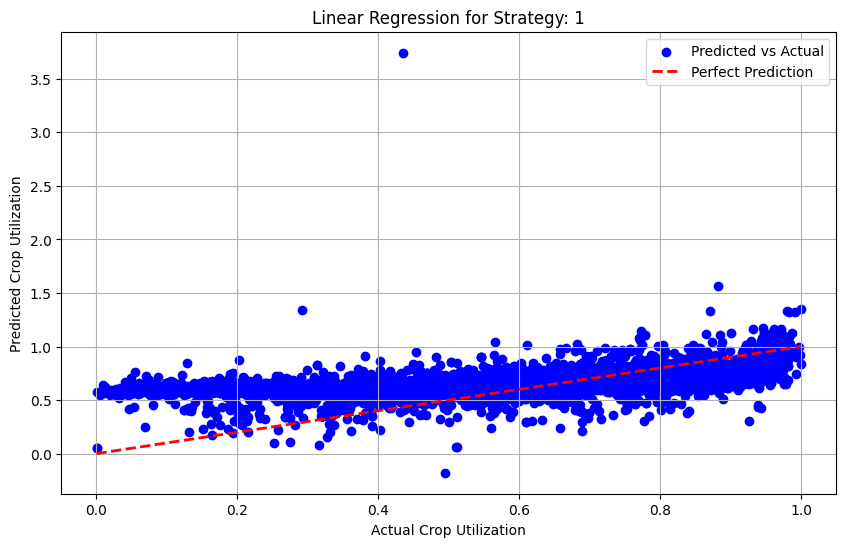

Mean Absolute Error for strategy 2: 0.07587781897573186


/var/folders/fh/jgqm1yt151v7yq2mx7jg_v_w0000gn/T/ipykernel_17620/639671824.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


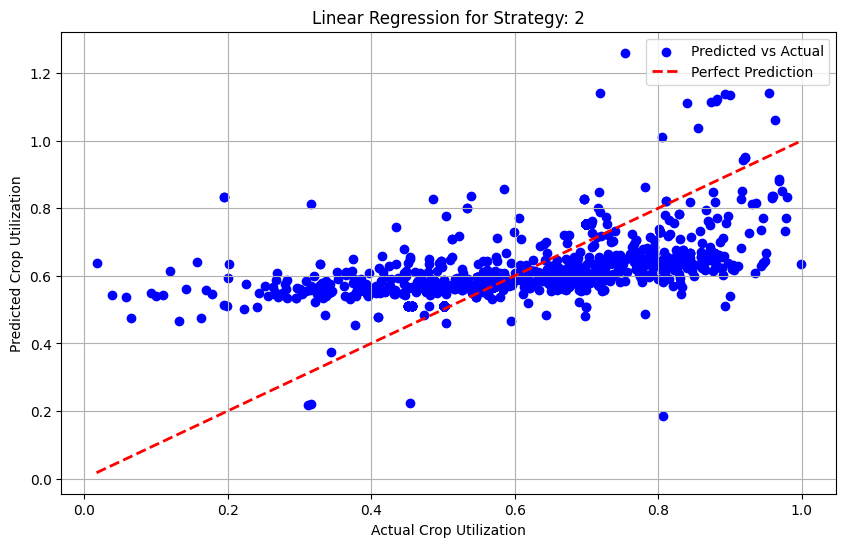

Mean Absolute Error for strategy 4: 0.10831671082297177


/var/folders/fh/jgqm1yt151v7yq2mx7jg_v_w0000gn/T/ipykernel_17620/639671824.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


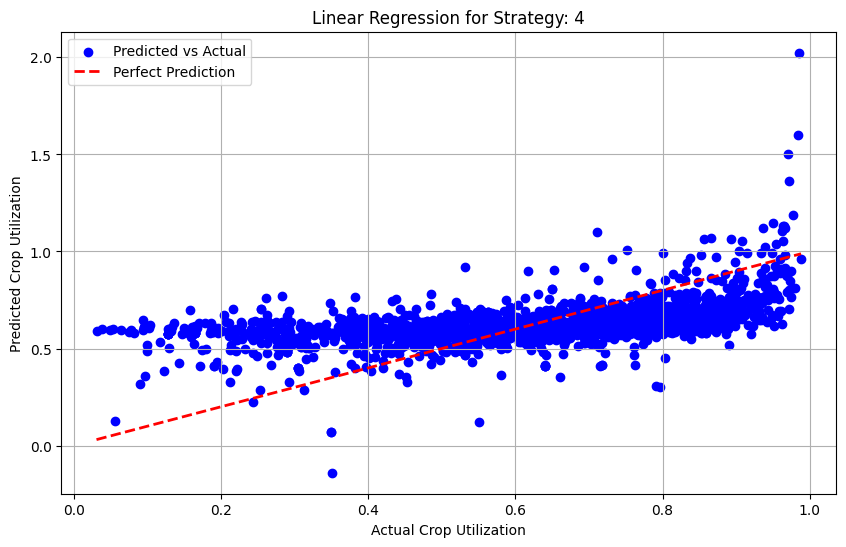

Mean Absolute Error for strategy 8: 0.11130536659789601


/var/folders/fh/jgqm1yt151v7yq2mx7jg_v_w0000gn/T/ipykernel_17620/639671824.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


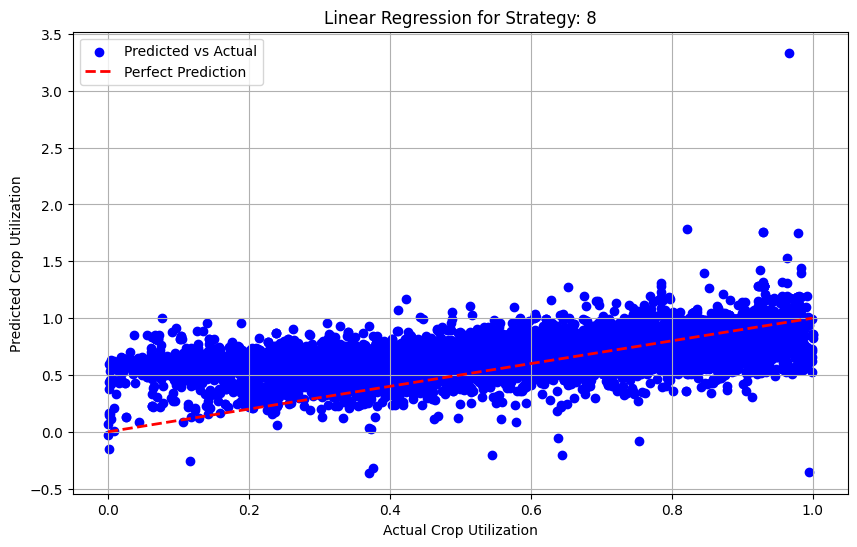

Mean Absolute Error for strategy 16: 0.1008931848941399


/var/folders/fh/jgqm1yt151v7yq2mx7jg_v_w0000gn/T/ipykernel_17620/639671824.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


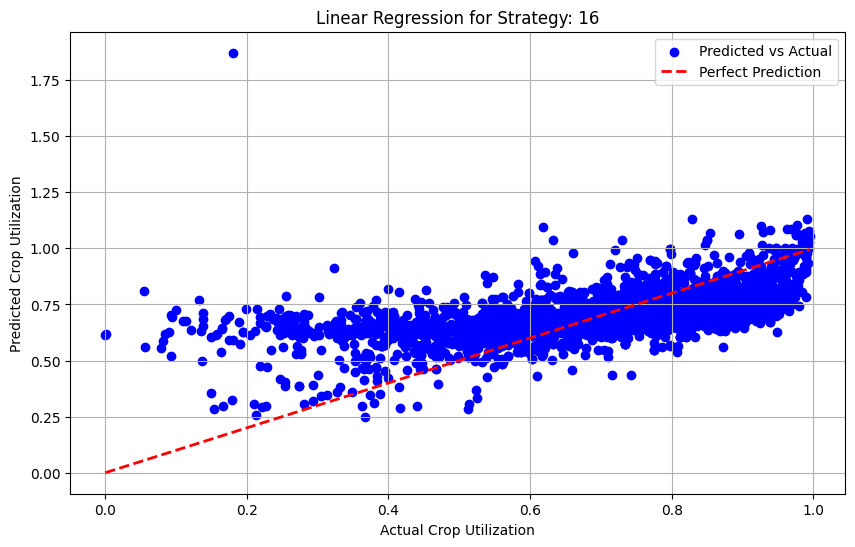

Mean Absolute Error for strategy 32: 0.11463965895750546


/var/folders/fh/jgqm1yt151v7yq2mx7jg_v_w0000gn/T/ipykernel_17620/639671824.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


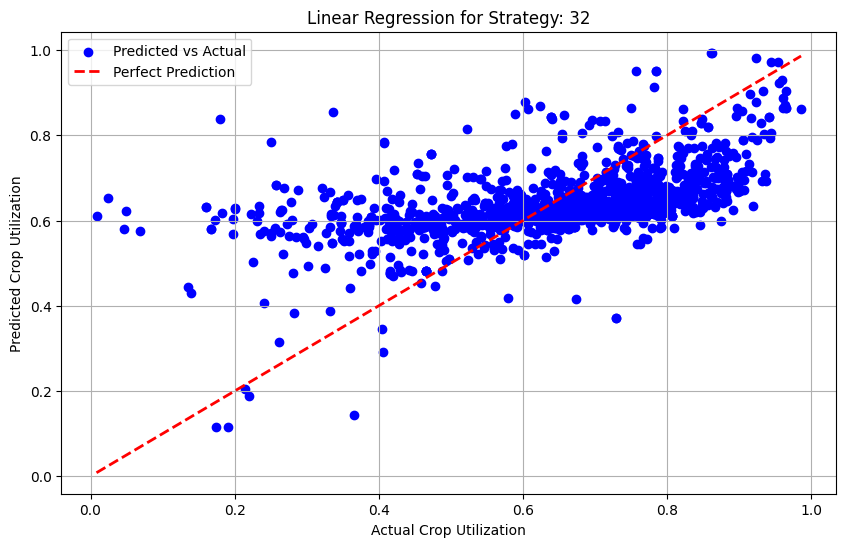

Mean Absolute Error for strategy 64: 0.10674503232528745


/var/folders/fh/jgqm1yt151v7yq2mx7jg_v_w0000gn/T/ipykernel_17620/639671824.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


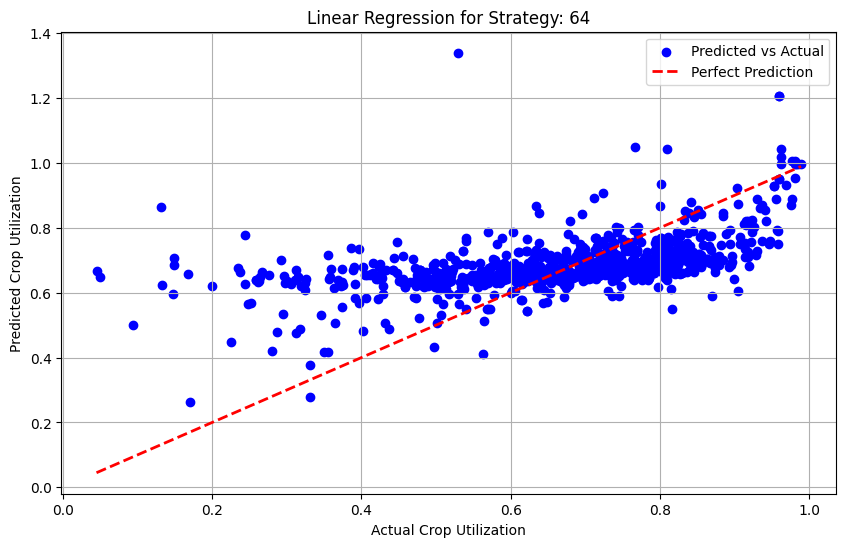

Mean Absolute Error for strategy 128: 0.11334468477553149


/var/folders/fh/jgqm1yt151v7yq2mx7jg_v_w0000gn/T/ipykernel_17620/639671824.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


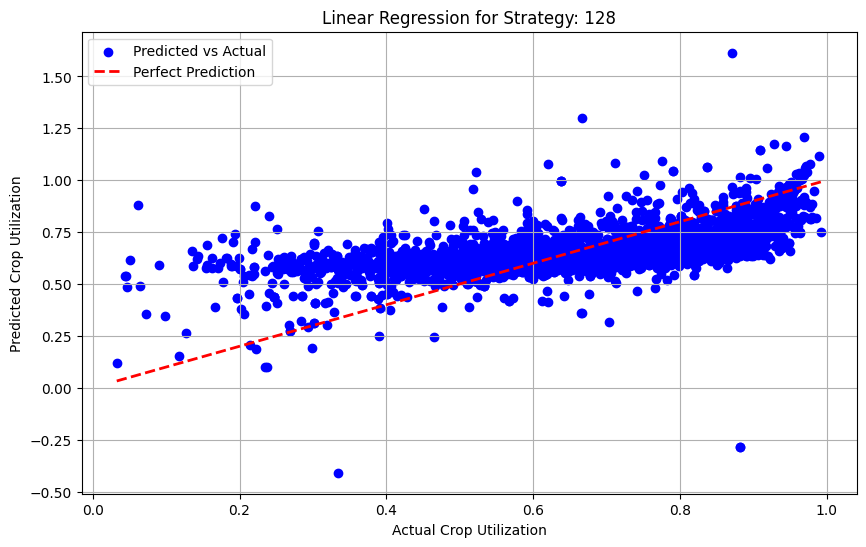

Mean Absolute Error for strategy 256: 0.09056337047297233


/var/folders/fh/jgqm1yt151v7yq2mx7jg_v_w0000gn/T/ipykernel_17620/639671824.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


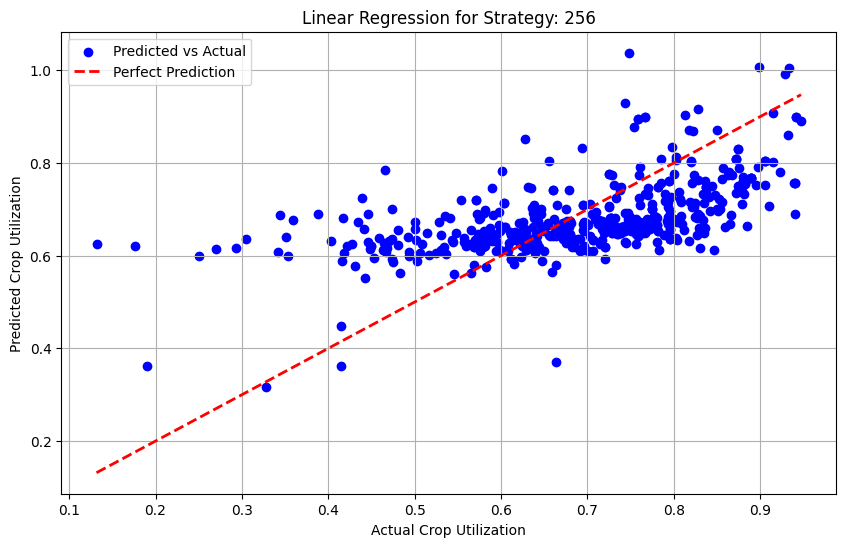

Mean Absolute Error for strategy 512: 0.11708796531329731


/var/folders/fh/jgqm1yt151v7yq2mx7jg_v_w0000gn/T/ipykernel_17620/639671824.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


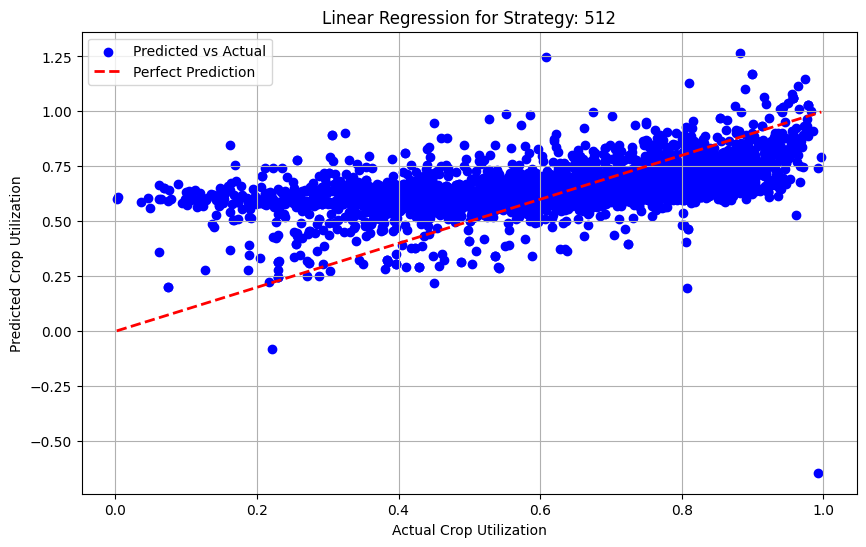

Mean Absolute Error for strategy 1024: 0.12435057973973145


/var/folders/fh/jgqm1yt151v7yq2mx7jg_v_w0000gn/T/ipykernel_17620/639671824.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


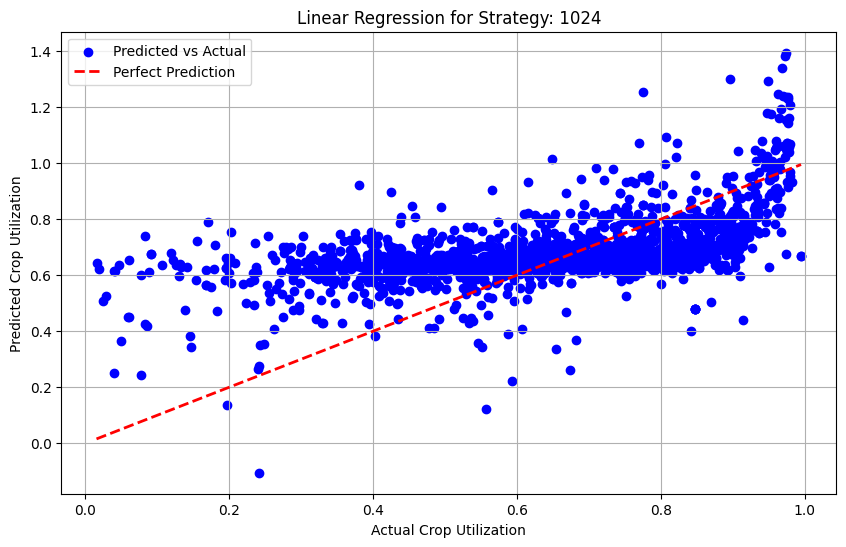

Mean Absolute Error for strategy 2048: 0.12670126339086432


/var/folders/fh/jgqm1yt151v7yq2mx7jg_v_w0000gn/T/ipykernel_17620/639671824.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


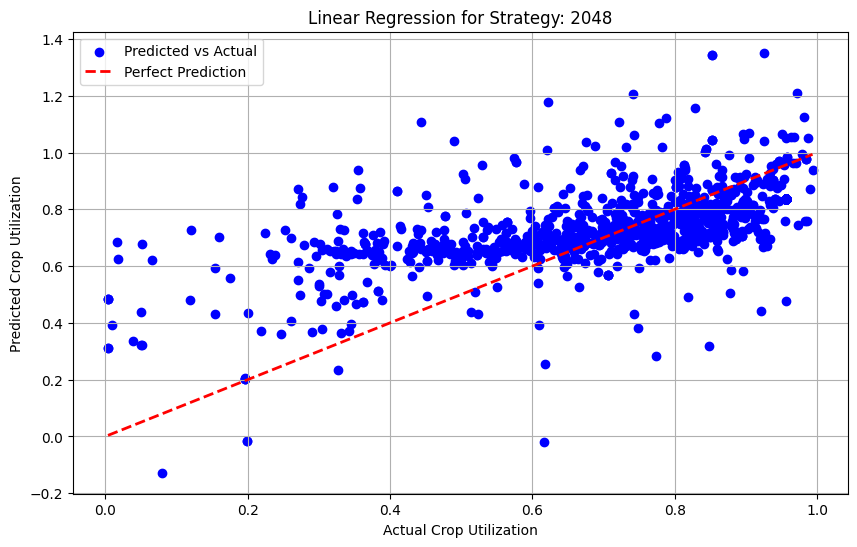

Mean Absolute Error for strategy 4096: 0.12620449579268003


/var/folders/fh/jgqm1yt151v7yq2mx7jg_v_w0000gn/T/ipykernel_17620/639671824.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


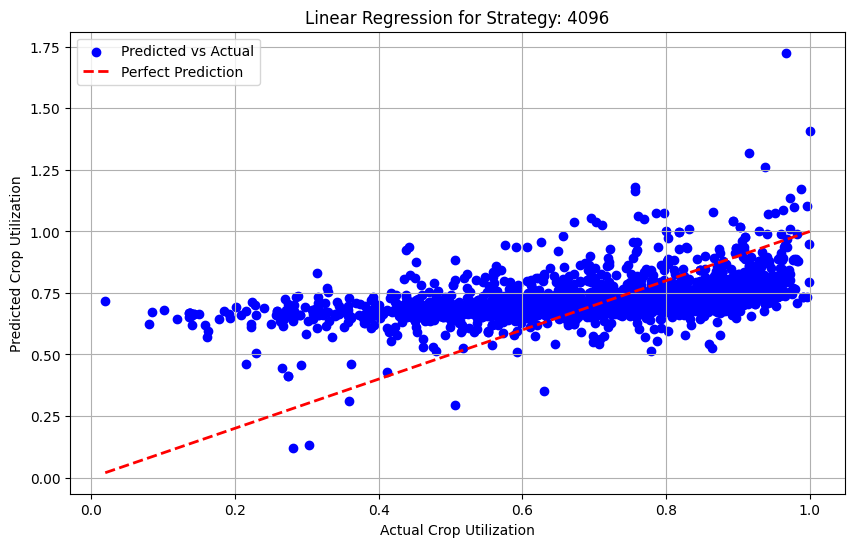

Mean Absolute Error for strategy 8192: 0.1336700162174164


/var/folders/fh/jgqm1yt151v7yq2mx7jg_v_w0000gn/T/ipykernel_17620/639671824.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


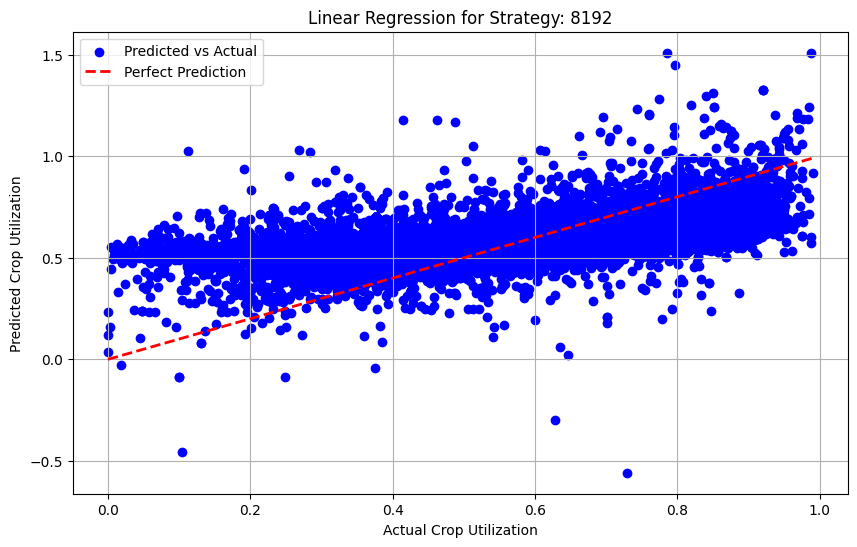

Mean Absolute Error for strategy 16384: 0.1184001536864067


/var/folders/fh/jgqm1yt151v7yq2mx7jg_v_w0000gn/T/ipykernel_17620/639671824.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


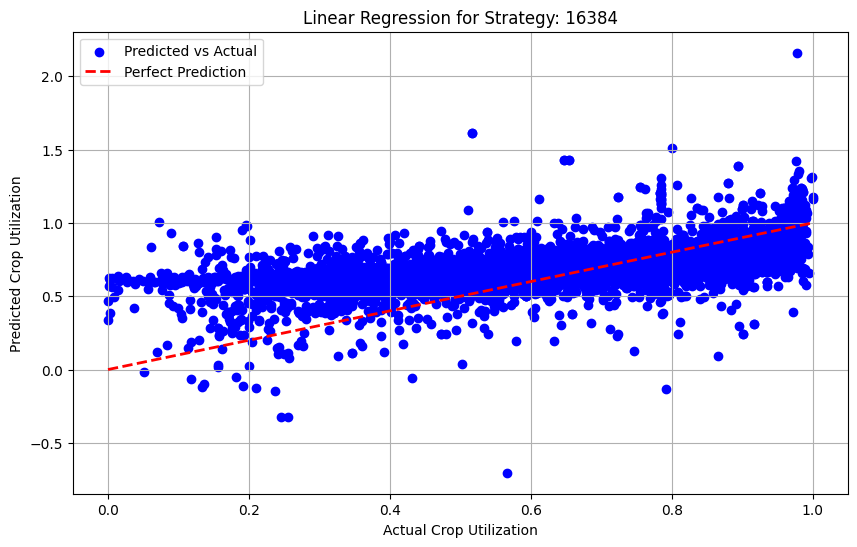

In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
nestdf = pd.read_csv('Nest.csv')
partavgdf = pd.read_csv('Part_Avg.csv')

# Merge dataframes on 'ixJobSummary'
joined_nest_partsavg_df = pd.merge(nestdf, partavgdf, on='ixJobSummary', how='inner')

# Calculate 'CropUtil'
joined_nest_partsavg_df['CropUtil'] = joined_nest_partsavg_df['dPartArea_Job'] / joined_nest_partsavg_df['dTrueAreaRectified_Job']

# Drop unnecessary columns
columns_to_drop = ['dLengthUsed_Avg', 'dWidthUsed_Avg', 'dTrueAreaRectified_Job', 'ixJobSummary']
joined_nest_partsavg_df.drop(columns=columns_to_drop, inplace=True)

# Separate data by strategy
strategy_groups = joined_nest_partsavg_df.groupby('fStrategies')

# Placeholder for models and scalers
models = {}
scalers = {}

# Train models for each strategy group and plot results
for strategy, group in strategy_groups:
    X = group.drop(columns=['CropUtil', 'fStrategies'])
    y = group['CropUtil']

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the modified data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize and train the linear regression model
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = linear_regression_model.predict(X_test)

    # Calculate and print the Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error for strategy {strategy}: {mae}")

    # Store the models and scalers
    models[strategy] = linear_regression_model
    scalers[strategy] = scaler

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
    plt.xlabel('Actual Crop Utilization')
    plt.ylabel('Predicted Crop Utilization')
    plt.title(f'Linear Regression for Strategy: {strategy}')
    plt.legend()
    plt.grid(True)
    plt.show()
